#### Importing necessary modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

#### Data Processing

In [3]:
data = pd.read_csv("Datasets/Credit Card Fraud Detection/creditcard.csv")

In [6]:
print(data.columns)
print("\n\n")
print(data.shape)
print("\n\n")
print(data.describe())

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')



(284807, 31)



                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01

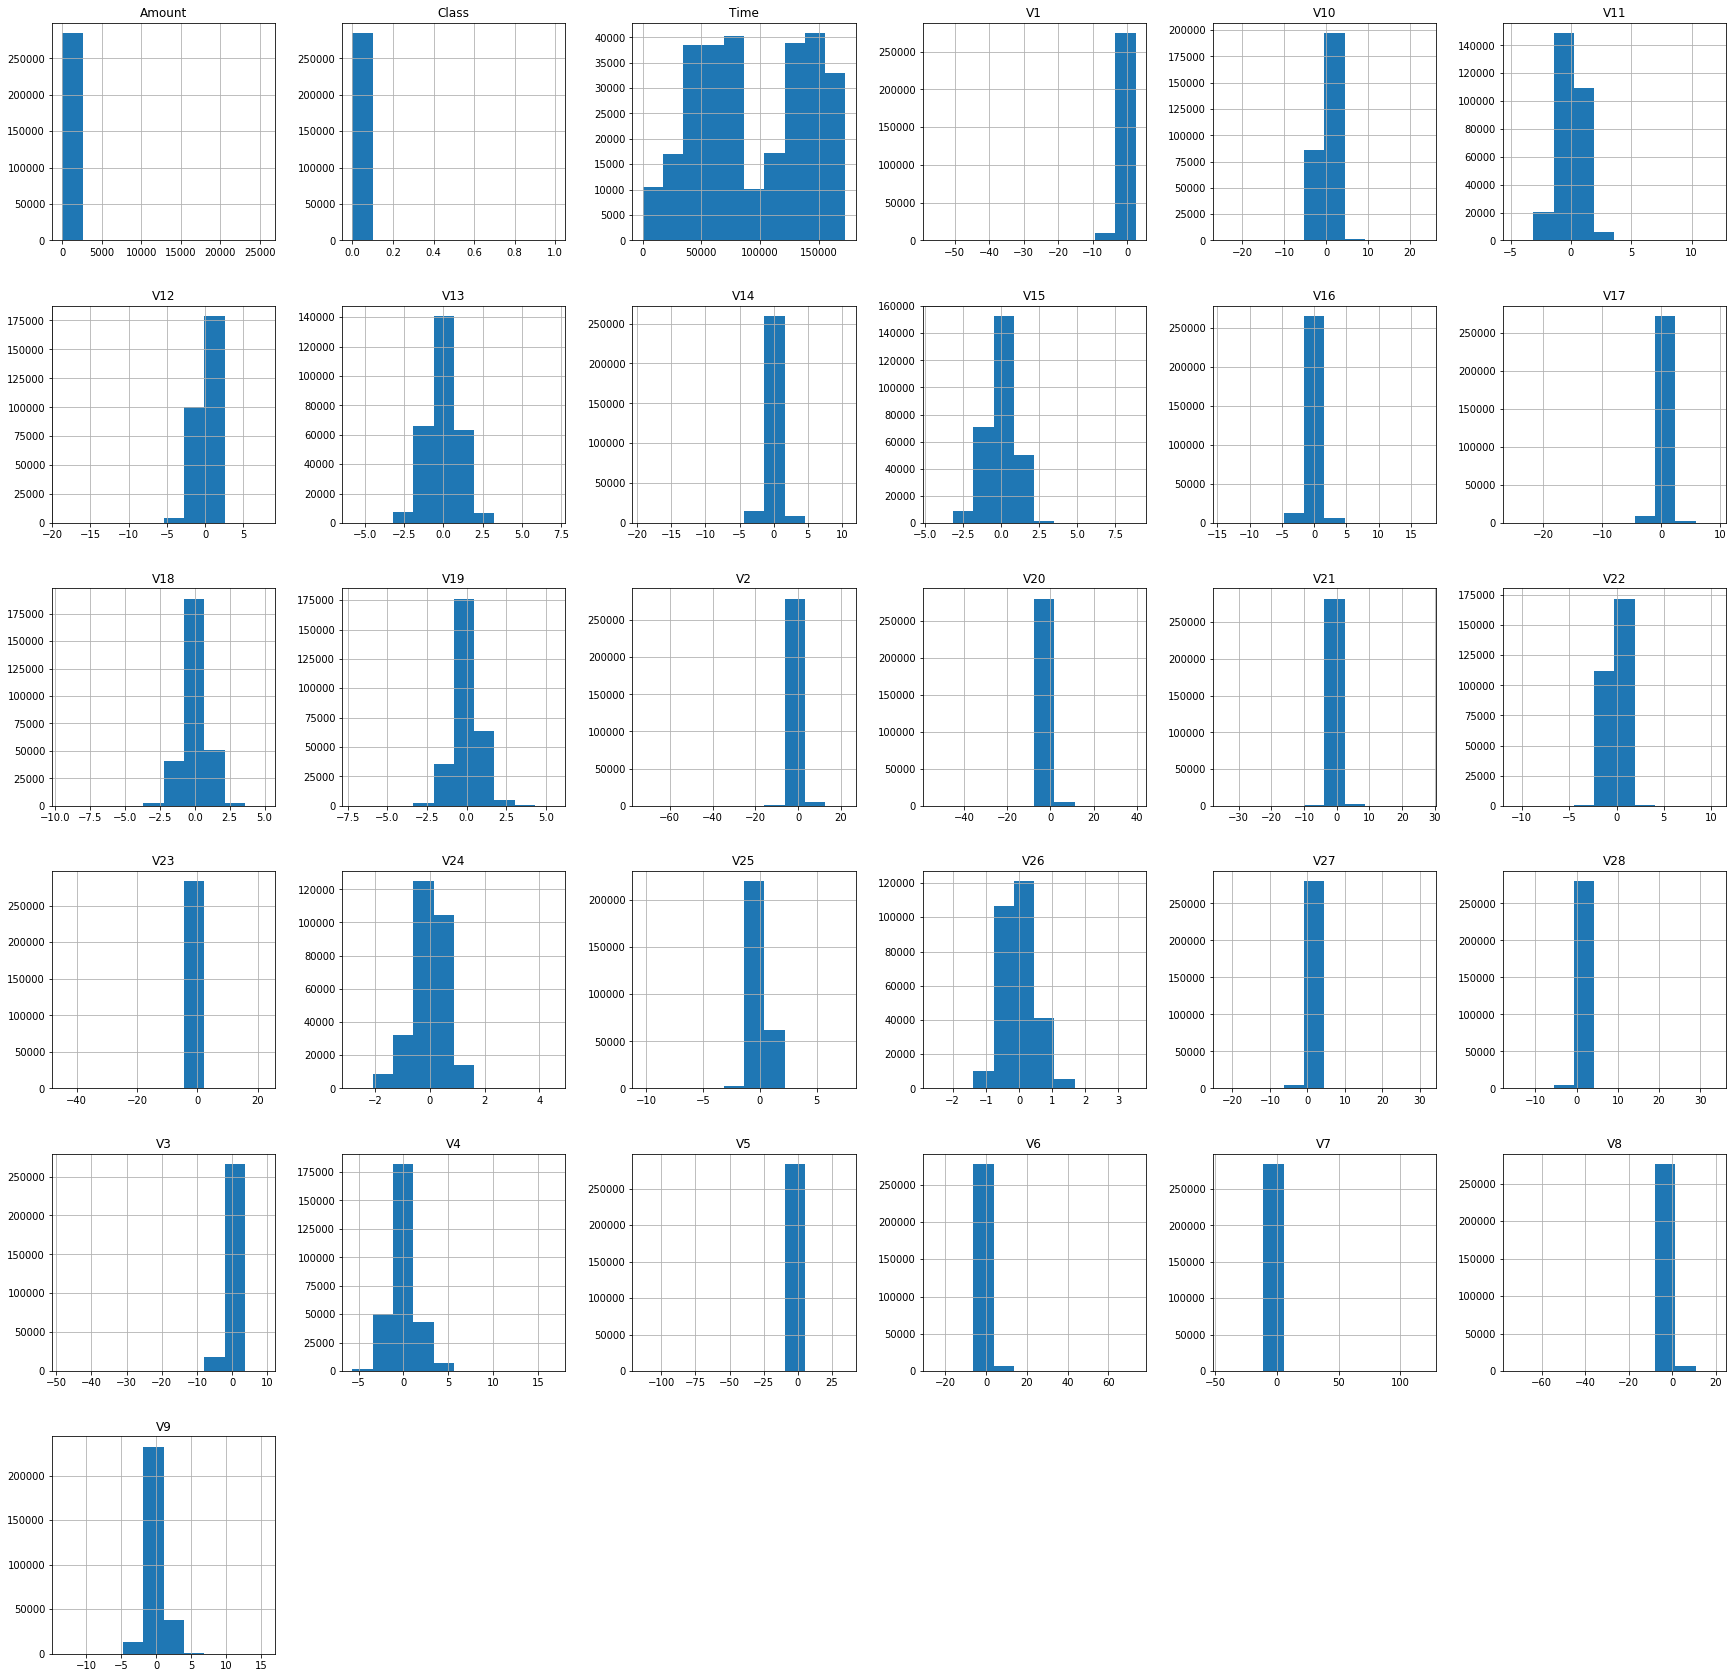

In [21]:
## Plot histogram

data.hist(figsize=(30,30))
plt.show()

In [27]:
val = len(data[data['Class'] == 0])
fr = len(data[data['Class'] == 1])

print("VALID TRANSACTIONS")
print(val)

print("\n\nFradaulent Transactions")
print(fr)

print("\n\nFraction of Fradaulent Transactions")
print((fr*100)/(val+fr))

outlier_fraction = (fr)/(val)
print("\n\nOutlier Fraction: {}".format(outlier_fraction))


### Outlier Fraction: fr)/(val)

VALID TRANSACTIONS
284315


Fradaulent Transactions
492


Fraction of Fradaulent Transactions
0.1727485630620034


Outlier Fraction: 0.0017304750013189597


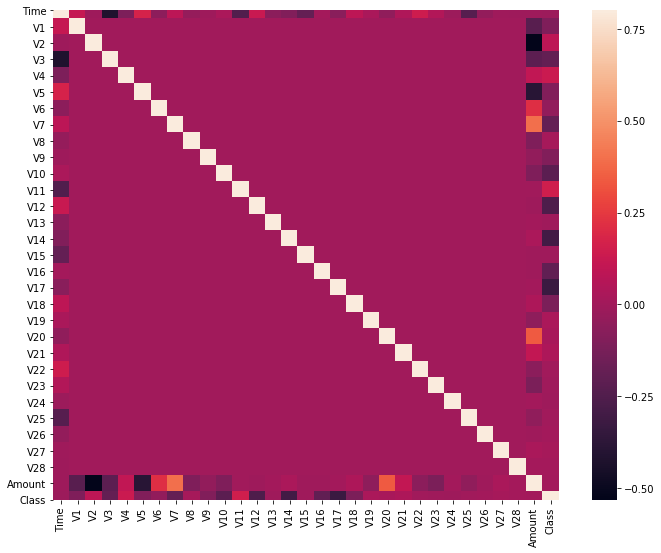

In [15]:
## Correlation matrix
cormat = data.corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(cormat, vmax = .8, square = True)
plt.show()

In [16]:
columns = data.columns.tolist()

In [17]:
columns = [c for c in columns if c not in ['Class']]

In [18]:
target = 'Class'

In [19]:
X = data[columns]
Y = data[target]

In [20]:
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


#### Machine Learning

In [22]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [28]:
## Define the outlier detection methods

classifiers = {
    "Isolation Forest": IsolationForest(
        max_samples=len(X),
        contamination = outlier_fraction,
        random_state=1),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction
    )
}

In [30]:
## Fit the model

n_outliers = fr


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
        
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    ## Reshape the prediction values to 0 for valid, 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    print("{}: {}".format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

D:\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 645
0.997735308472053
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.35      0.35       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor: 935
0.9967170750718908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807

